# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [9]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# SELV
import itertools as it
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [134]:
# code for solving the model (remember documentation and comments)
#x1=c
#x2=l
def u_func(model,x1,x2):
    return np.log(x1)-model.v*(x2**(1+1/model.epsilon)/(1+1/model.epsilon))

In [182]:
def solve(model):
        
    # a. objective function (to minimize) 
    obj = lambda x: -model.u_func(x[0],x[1]) # minimize -> negtive of utility
        
    # b. constraints and bounds
    con = lambda x: x[0]-model.m-model.w*x[1]+model.tau_0*model.w*x[1]+np.max(model.tau_1*(model.w*x[1]-model.k),0) # violated if negative
    
    constraints = ({'type':'ineq','fun':con})
    
    bounds = ((0,10),(0,1))
        
    # c. call solver
    x0 = [0.5,0.5]
    sol = optimize.minimize(obj,x0,method='SLSQP',bounds=bounds,constraints=constraints)
        
    # d. save
    model.x1 = sol.x[0]
    model.x2 = sol.x[1]
    model.u = model.u_func(model.x1,model.x2)

In [183]:
#metode 2
# def fucntion

def u_func2(c,l,v,epsilon):
    return np.log(c)-v*((l**(1+1/epsilon))/(1+1/epsilon))

In [211]:
# Find bst solution (optimize)
def find_best_choice(v,epsilon,m,w,tau_0,tau_1,k,N,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N)
    c_values = np.empty(shape_tuple)
    l_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. start from guess of c_best=l_best=0
    x_max = 1
    c_best = 0
    l_best = 0
    u_best = u_func2(0,0,v,epsilon)
    
    # c. loop through all possibilities
    for i in range(N):
            
        # i. c and l (chained assignment)
        l_values[i] = l = (i/(N-1))*x_max
        c_values[i] = c = m+w*l_values[i]-(tau_0*w*l_values[i]+np.max(tau_1*(w*l_values[i]-k),0))
        u_values[i] = u_func2(c_values[i],l_values[i],v,epsilon)

        if u_values[i] > u_best:
            c_best = c_values[i]
            l_best = l_values[i] 
            u_best = u_values[i]
    
    # d. print
    if do_print:
        print_solution(c_best,l_best,u_best)

    return c_best,l_best,u_best,c_values,l_values,u_values

# function for printing the solution
def print_solution(c,l,u):
    print(f'c = {c:.8f}')
    print(f'l = {l:.8f}')
    print(f'u  = {u:.8f}')


In [194]:
#Metode 3
#Multi-dim. contstraint solver
# a. objective function (to minimize)
def value_of_choice(c,l,v,epsilon,m,w,tau_0,tau_1,k):
    # note: x is a vector
    c = x[0]
    x2 = x[1]
    return -u_func(x1,x2,alpha)

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(alpha,I,p1,p2),
    method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

NameError: name 'I' is not defined

In [ ]:
#Metode 4
#Multi-dim. using monotonicity 
# a. objective funciton (to minimize)
def value_of_choice(X,epsilon,m,w,tau_0,tau_1,k):
    X = m-w*l-(tau_0) 
    return -u_func(x1,x2,alpha)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,I/p1),args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case1.x
x2 = (I-p1*x1)/p2
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

# Question 2

ADD ANSWER.

In [184]:
class LaborClass:
    
    def __init__(self):
        
        self.m = 1
        self.v = 10
        self.epsilon = 0.3
        self.tau_0 = 0.4
        self.tau_1 = 0.1
        self.k = 0.4
        self.w = 0.75
            
    u_func = u_func
    solve = solve

In [185]:
Number1 = LaborClass()
Number1.solve()
print(f'(c,l) = ({Number1.x1:.3f},{Number1.x2:.3f})')

(c,l) = (10.000,0.033)


In [142]:
for w in np.linspace(0.5,1.5,20):
    Number1.w=w
    Number1.solve()
    print(f'w={w:.3f} -> (c,l) = ({Number1.x1:.3f},{Number1.x2:.3f})')

w=0.500 -> (c,l) = (10.000,0.033)
w=0.553 -> (c,l) = (10.000,0.033)
w=0.605 -> (c,l) = (10.000,0.033)
w=0.658 -> (c,l) = (10.000,0.033)
w=0.711 -> (c,l) = (10.000,0.033)
w=0.763 -> (c,l) = (10.000,0.033)
w=0.816 -> (c,l) = (10.000,0.033)
w=0.868 -> (c,l) = (10.000,0.033)
w=0.921 -> (c,l) = (10.000,0.033)
w=0.974 -> (c,l) = (10.000,0.033)
w=1.026 -> (c,l) = (10.000,0.033)
w=1.079 -> (c,l) = (10.000,0.033)
w=1.132 -> (c,l) = (10.000,0.033)
w=1.184 -> (c,l) = (10.000,0.033)
w=1.237 -> (c,l) = (10.000,0.033)
w=1.289 -> (c,l) = (10.000,0.033)
w=1.342 -> (c,l) = (10.000,0.033)
w=1.395 -> (c,l) = (10.000,0.033)
w=1.447 -> (c,l) = (10.000,0.033)
w=1.500 -> (c,l) = (10.000,0.033)


In [217]:
# Forsøg 2, med w=1
find_best_choice(v=10,epsilon=0.3,m=1,w=1,tau_0=0.4,tau_1=0.1,k=0.4,N=600,do_print=True)


c = 1.23115192
l = 0.38230384
u  = 0.17217230
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


1, 1.51412354, 1.51495826,
        1.51579299, 1.51662771, 1.51746244, 1.51829716, 1.51913189,
        1.51996661, 1.52080134, 1.52163606, 1.52247078, 1.52330551,
        1.52414023, 1.52497496, 1.52580968, 1.52664441, 1.52747913,
        1.52831386, 1.52914858, 1.52998331, 1.53081803, 1.53165275,
        1.53248748, 1.5333222 , 1.53415693, 1.53499165, 1.53582638,
        1.5366611 , 1.53749583, 1.53833055, 1.53916528, 1.54      ]),
 array([0.        , 0.00166945, 0.0033389 , 0.00500835, 0.0066778 ,
        0.00834725, 0.01001669, 0.01168614, 0.01335559, 0.01502504,
        0.01669449, 0.01836394, 0.02003339, 0.02170284, 0.02337229,
        0.02504174, 0.02671119, 0.02838063, 0.03005008, 0.03171953,
        0.03338898, 0.03505843, 0.03672788, 0.03839733, 0.04006678,
        0.04173623, 0.04340568, 0.04507513, 0.04674457, 0.04841402,
        0.05008347, 0.05175292, 0.05342237, 0.05509182, 0.05676127,
        0.05843072, 0.06010017, 0.06176962, 0.06343907, 0.06510851,
        0.06677796,

In [225]:
#forsøg 2 figur
#uniform w
w_list = np.linspace(0.5,1.5,num=100)
l_list = np.zeros(w_list.size)
c_list = np.zeros(w_list.size)

for i in range(w_list.size):
    c_best,l_best = find_best_choice(v=10,epsilon=0.3,m=1,w=w_list[i],tau_0=0.4,tau_1=0.1,k=0.4,N=600,do_print=False)
    l_list[i]=l_best
    c_list[i]=c_best



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


ValueError: too many values to unpack (expected 2)

In [232]:
# code for solving the model (remember documentation and comments)
## define parameters
m = 1
v = 10
e = 0.3 # epsilon
t_0 = 0.4 # tau0
t_1 = 0.1 # tau1
k = 0.4 # kappa
w=1

## define equations
def x(m, w, l, t_0, t_1, k) : 
    return m + w*l - (t_0*w*l+t_1*max(w*l-k,0))

def u_func(l, c, e, v) :
    return np.log(c) - v * ((l ** (1 + (1 / e))) / (1 + (1 / e)))


def value_of_choice(l, e, v, m, w, t_0, t_1, k) :
    c = x(m, w, l, t_0, t_1, k)
    return -u_func(l, c, e, v)


def solve_supplyproblem(e, v, m, w, t_0, t_1, k) : 
    solution = optimize.minimize_scalar(value_of_choice, method='bounded', bounds=(0, 1), args=(e, v, m, w, t_0, t_1, k))
    l = solution.x 
    c = x(m, w, l, t_0, t_1, k)
    u = u_func(l, c, e, v)
    return l, c, u
    print(l,c,u)

In [235]:
solve_supplyproblem(e, v, m, w, t_0, t_1, k)


(0.4000006819648219, 1.240000340982411, 0.17158308392555602)

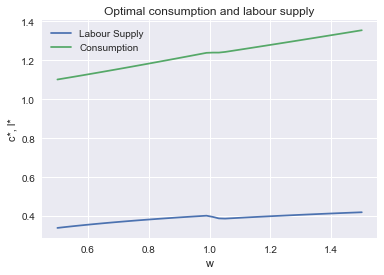

In [222]:
# code
w_list = np.linspace(0.5, 1.5, num=50)
l_list = np.zeros(w_list.size)
c_list = np.zeros(w_list.size)

for i in range(w_list.size) :
    l, c, _ = solve_supplyproblem(e, v, m, w_list[i], t_0, t_1, k)
    l_list[i] = l
    c_list[i] = c

plt.plot(w_list, l_list)
plt.plot(w_list, c_list)
plt.grid(True)
plt.xlabel("w")
plt.ylabel("c*, l*")
plt.legend(["Labour Supply", "Consumption"])
plt.title("Optimal consumption and labour supply")
plt.show()

# Question 3

ADD ANSWER.

In [11]:
# code



# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.